In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [38]:
import keras as k
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib
from plot_functions import adjustAxeProperties
%matplotlib inline
matplotlib.style.use('ggplot')

In [45]:
def plot_history(history_object):
    FONTSIZE = 23
    plt.close('all')
    fig = plt.figure(figsize=(18, 7.5))
    gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    epochs = range(1, len(history.history['loss']) + 1)

    # plot loss function
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    ax = plt.subplot(gs[0, 0])
    ax.plot(epochs, train_loss, marker='o', label='training loss')
    ax.plot(epochs, val_loss, marker='x', label='validation loss')
    ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylabel('Loss', fontsize=FONTSIZE, labelpad=15)
    ax.set_xticks(np.arange(1, len(epochs)+1, 2))
    ax.set_ylim(0, 1.0)        
    adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
    ax.legend(loc='best', fontsize=FONTSIZE*0.85)
    ax.set_title('Loss fucntion', fontsize=FONTSIZE)


    # plot acuracy
    train_acuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    ax = plt.subplot(gs[0, 1])
    ax.plot(epochs, train_acuracy, marker='o', label='training acc.')
    ax.plot(epochs, val_accuracy, marker='x', label='validation acc.')
    ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylabel('Accuracy', fontsize=FONTSIZE, labelpad=15)
    ax.set_xticks(np.arange(1, len(epochs)+1, 2))
    ax.set_ylim(0, 1.0)    
    adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
    ax.legend(loc='best', fontsize=FONTSIZE*0.85)
    ax.set_title('Binary accuracy', fontsize=FONTSIZE)

    plt.tight_layout(w_pad=3.0, h_pad=1)

In [18]:
max_features = 10000
max_len = 500
embed_dim = 128

In [19]:
(x_train, y_train), (x_test, y_test) = k.datasets.imdb.load_data(num_words=max_features)

In [20]:
x_train = k.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = k.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [32]:
model = k.models.Sequential()

model.add(
    k.layers.Embedding(
        max_features, 
        embed_dim, 
        input_length=max_len
    )
)

model.add(
    k.layers.Conv1D(
        filters=32,
        kernel_size=7,
        activation='relu'
    )
)

model.add(
    k.layers.MaxPooling1D(pool_size=5)
)

model.add(
    k.layers.Conv1D(
        filters=32,
        kernel_size=7,
        activation='relu'
    )
)

model.add(
    k.layers.GlobalMaxPooling1D()
)

model.add(
    k.layers.Dense(1, activation='relu')
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(
    optimizer=k.optimizers.RMSprop(lr=1e-4), 
    loss='binary_crossentropy', 
    metrics=['acc']
)


In [34]:
history = model.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)               

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.7682 - acc: 0.5142 - val_loss: 0.6869 - val_acc: 0.5574
Epoch 2/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.6698 - acc: 0.6481 - val_loss: 0.6686 - val_acc: 0.6404
Epoch 3/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.6279 - acc: 0.7471 - val_loss: 0.6210 - val_acc: 0.7010
Epoch 4/10
20000/20000 [==============================] - 98s 5ms/step - loss: 0.5382 - acc: 0.8091 - val_loss: 0.4959 - val_acc: 0.7926
Epoch 5/10
20000/20000 [==============================] - 104s 5ms/step - loss: 0.4090 - acc: 0.8475 - val_loss: 0.4143 - val_acc: 0.8362
Epoch 6/10
20000/20000 [==============================] - 93s 5ms/step - loss: 0.3358 - acc: 0.8783 - val_loss: 0.4198 - val_acc: 0.8372
Ep

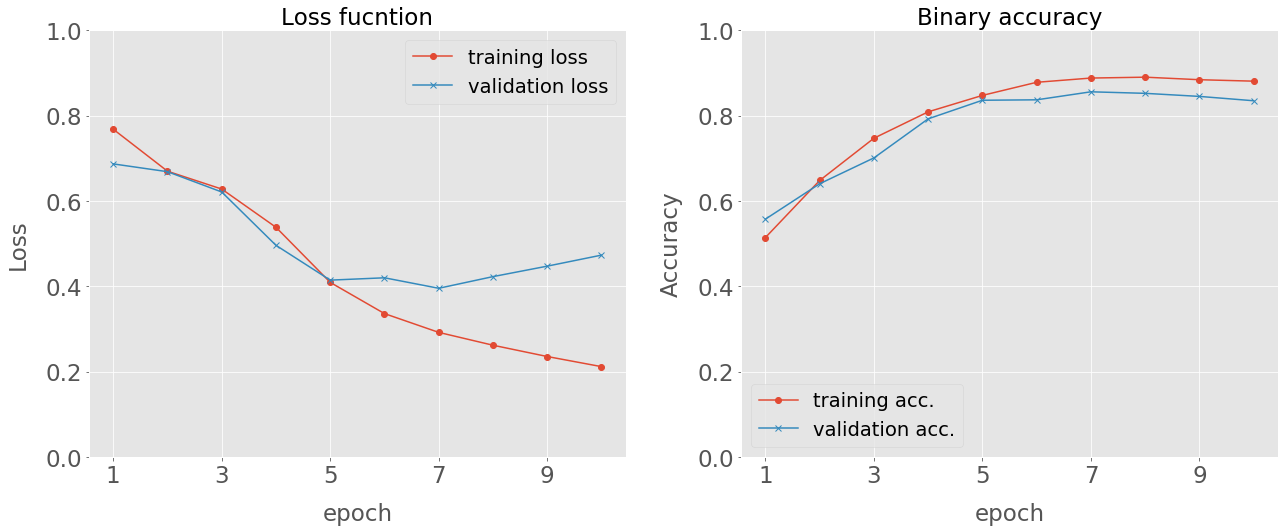

In [46]:
plot_history(history)